In [3]:
#from google.colab import files
from scipy import stats
import pandas as pd
import numpy as np

NBA = pd.read_csv('../../data/nba.csv')
import warnings
warnings.filterwarnings('ignore')

In [4]:
#NBA.isna().sum()
print(NBA.columns)
NBA_NUM = NBA[['age',
       'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
NBA_NUM.replace('Undrafted',0, inplace = True)
NBA_NUM

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248
1,28.0,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043
2,26.0,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125
3,30.0,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125
4,23.0,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,29.0,213.36,127.005760,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233
12840,20.0,213.36,86.182480,19,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066
12841,25.0,205.74,102.511792,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052
12842,24.0,208.28,113.398000,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044


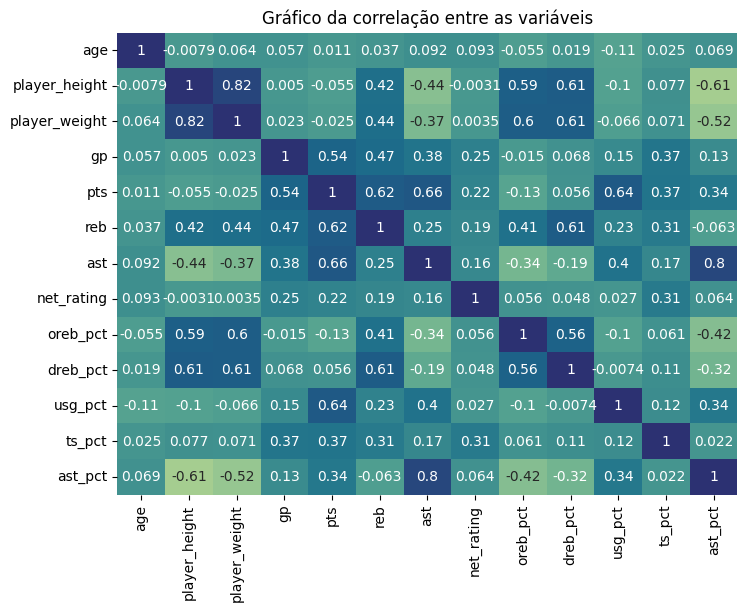

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
grafico = sns.heatmap(data=NBA_NUM.corr(numeric_only=True), annot=True, cmap='crest', cbar=False)
grafico.set_title("Gráfico da correlação entre as variáveis")
plt.show(grafico)

In [6]:
print(f'''Informações sobre as variáveis do conjunto de dados da NBA: {NBA.info()}\n
Informações sobre as estatísticas do conjunto de dados da NBA: {pd.DataFrame(NBA_NUM.describe())}\n''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [7]:
pd.DataFrame(NBA_NUM.describe())

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [8]:
# Buscando insights sobre longevidade e pontuação utilizando agrupamento por idade e pontos

agrupado_NBA = NBA.groupby(['player_name','pts', 'age']).size().reset_index(name='Agrupamento 1')

# posteriormente utilizando filtros para visualizar apenas os com 30 anos ou mais e 30 pontos ou mais.

agrupado_NBA[(agrupado_NBA['age'] >= 30) & (agrupado_NBA['pts'] >= 30)]

,player_name,pts,age,Agrupamento 1
326,Allen Iverson,30.7,30.0,1
329,Allen Iverson,33.0,31.0,1
2578,Damian Lillard,32.2,32.0,1
5441,James Harden,34.3,30.0,1
7741,LeBron James,30.3,37.0,1
11282,Stephen Curry,32.0,33.0,1


In [9]:
# Aqui é utilizado alguns filtros para separar as métricas de LeBron James por eras, ou seja, cada time que ele passou.

# Era 1, onde iniciou sua carreira jogando no Cleveland Cavaliers e foi draftado em 1º lugar.

l1 = pd.concat([NBA[(NBA['season'] == '2003-04') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2004-05') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2005-06') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2006-07') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2007-08') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2009-10') & (NBA['player_name'] == 'LeBron James')]],axis=0)
l1_NUM = l1[['age','player_height', 'player_weight', 'gp',
             'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
             'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

# Era 2, onde jogou no Miami Heat e conseguiu seus dois primeiros títulos da NBA.

l2 = pd.concat([NBA[(NBA['season'] == '2003-04') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2010-11') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2011-12') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2012-13') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2013-14') & (NBA['player_name'] == 'LeBron James')]],axis=0)
l2_NUM = l2[['age','player_height', 'player_weight', 'gp',
             'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
             'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

# Era 3, na qual retornou ao Cleveland Cavaliers e conseguiu mais um de seus títulos da NBA.

l3 = pd.concat([NBA[(NBA['season'] == '2003-04') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2014-15') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2015-16') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2016-17') & (NBA['player_name'] == 'LeBron James')]],axis=0)
l3_NUM = l3[['age','player_height', 'player_weight', 'gp',
             'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
             'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

# Era 4 e atual franquia a qual LeBron joga, no Los Angels Lakers, franquia a qual conseguiu seu 4º título.

l4 = pd.concat([NBA[(NBA['season'] == '2003-04') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2017-18') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2018-19') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2019-20') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2020-21') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2021-22') & (NBA['player_name'] == 'LeBron James')],
NBA[(NBA['season'] == '2021-22') & (NBA['player_name'] == 'LeBron James')]],axis=0)
l4_NUM = l4[['age','player_height', 'player_weight', 'gp',
             'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
             'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

In [10]:
# Função describe melhorada, apresenta mais medidas estatísticas que a função comum.

def dscb_plus(NBA_NUM):

  # Dicionário que armazena o nome das colunas do novo dataframe

  dic1 = {'Métricas': ['Contagem', 'Média', 'Mediana', 'Moda', 'Variância', 'Desvio padrão', 'Simetria', 'Amplitude', '1° Quartil', '2° Quartil', '3° Quartil', 'Intervalo interquatil']}

  # Loop para varrer todas variáveis do conjunto e calcular as métricas: contagem, média, mediana, moda, variância, desvio padrão, simetria, Amplitude, 1° Quartil, 2° Quartil, 3° Quartil, Intervalo interquatil
  for coluna in NBA_NUM.columns:
    dic2 = {coluna:[NBA_NUM[coluna].count(),
                    NBA_NUM[coluna].mean(),
                    NBA_NUM[coluna].median(),
                    NBA_NUM[coluna].mode()[0],
                    NBA_NUM[coluna].var(),
                    NBA_NUM[coluna].std(),
                    NBA_NUM[coluna].skew(),
                    max(NBA_NUM[coluna]) - min(NBA_NUM[coluna]),
                    NBA_NUM[coluna].quantile(0.25),
                    NBA_NUM[coluna].quantile(0.5),
                    NBA_NUM[coluna].quantile(0.75),
                    NBA_NUM[coluna].quantile(0.75) - NBA_NUM[coluna].quantile(0.25)]}

    # O dicionario 1 torna-se uma mescla do dicionário 1 e 2, esse processo é repetido até varrer todas as variáveis do conjunto.

    dic1 = {**dic1, **dic2}
  dcrbplus = pd. DataFrame(dic1)

  # Métricas a parte que serão úteis para comparação entre jogadores.

  print(f'''describe melhorado:\n
  pontuacao maxima: {max(NBA_NUM['pts'])}\n
  pontuacao minima: {min(NBA_NUM['pts'])}\n
  rebotes maximo: {max(NBA_NUM['reb'])}\n
  rebotes minimo: {min(NBA_NUM['reb'])}\n
  assistencias maxima: {max(NBA_NUM['ast'])}\n
  assistencias minima: {min(NBA_NUM['ast'])}\n'''),
  return dcrbplus
print(f'''Estatísticas da primeira era do LeBron James:\n\n {pd.DataFrame(dscb_plus(l1_NUM))}\n\n''')
print(f'''Estatísticas da segunda era do LeBron James:\n\n {pd.DataFrame(dscb_plus(l2_NUM))}\n\n''')
print(f'''Estatísticas da terceira era do LeBron James:\n\n {pd.DataFrame(dscb_plus(l3_NUM))}\n\n''')
print(f'''Estatísticas da quarta era do LeBron James:\n\n {pd.DataFrame(dscb_plus(l4_NUM))}\n\n''')

describe melhorado:

  pontuacao maxima: 31.4

  pontuacao minima: 20.9

  rebotes maximo: 7.9

  rebotes minimo: 5.5

  assistencias maxima: 8.6

  assistencias minima: 5.9

Estatísticas da primeira era do LeBron James:

                  Métricas        age  player_height  player_weight         gp  \
0                Contagem   6.000000   6.000000e+00       6.000000   6.000000   
1                   Média  21.666667   2.032000e+02     110.374053  77.833333   
2                 Mediana  21.500000   2.032000e+02     108.862080  78.500000   
3                    Moda  19.000000   2.032000e+02     108.862080  79.000000   
4               Variância   4.666667   9.693523e-28       5.486552   3.766667   
5           Desvio padrão   2.160247   3.113442e-14       2.342339   1.940790   
6                Simetria   0.462910   0.000000e+00       0.968246  -0.638368   
7               Amplitude   6.000000   0.000000e+00       4.535920   5.000000   
8              1° Quartil  20.250000   2.032000e

In [11]:
# Criando um data frame formado pela concatenação, ao longo do eixo zero, de todos os jogadores que jogaram de 2003 a 2009, ou seja, era 1 de LeBron James.

E1 = pd.concat([
    NBA[(NBA['season'] == '2003-04')],
    NBA[(NBA['season'] == '2004-05')],
    NBA[(NBA['season'] == '2005-06')],
    NBA[(NBA['season'] == '2006-07')],
    NBA[(NBA['season'] == '2007-08')],
    NBA[(NBA['season'] == '2008-09')],
    NBA[(NBA['season'] == '2009-10')]], axis=0)

# Criando um data frame formado pela concatenação, ao longo do eixo zero, de todos os jogadores que jogaram de 2010 a 2014, ou seja, era 2 de LeBron James.

E2 = pd.concat([
    NBA[(NBA['season'] == '2010-11')],
    NBA[(NBA['season'] == '2011-12')],
    NBA[(NBA['season'] == '2012-13')],
    NBA[(NBA['season'] == '2013-14')]], axis=0)

# Criando um data frame formado pela concatenação, ao longo do eixo zero, de todos os jogadores que jogaram de 2014 a 2016, ou seja, era 3 de LeBron James.

E3 = pd.concat([
    NBA[(NBA['season'] == '2014-15')],
    NBA[(NBA['season'] == '2015-16')],
    NBA[(NBA['season'] == '2016-17')]], axis=0)

# Criando um data frame formado pela concatenação, ao longo do eixo zero, de todos os jogadores que jogaram de 2017 a 2022, ou seja, era 4 de LeBron James.

E4 = pd.concat([
    NBA[(NBA['season'] == '2017-18')],
    NBA[(NBA['season'] == '2018-19')],
    NBA[(NBA['season'] == '2019-20')],
    NBA[(NBA['season'] == '2020-21')],
    NBA[(NBA['season'] == '2021-22')],
    NBA[(NBA['season'] == '2022-23')]], axis=0)

In [12]:
# Data frames com os jogadores que tiveram métricas similares as médias de LeBron James em cada era, utilizando condicionais lógicas para filtra-los.

comp1 = E1[(E1['pts'] >= l1['pts'].mean()-3) & (E1['reb'] >= l1['reb'].mean()-2) & (E1['ast']>=l1['ast'].mean()-2)]
comp2 = E2[(E2['pts'] >= l2['pts'].mean()-2) & (E2['reb'] >= l2['reb'].mean()-2) & (E2['ast']>= l2['ast'].mean()-2)]
comp3 = E3[(E3['pts'] >= l3['pts'].mean()) & (E3['reb']>= l3['reb'].mean()) & (E3['ast']>= l3['ast'].mean())]
comp4 = E4[(E4['pts'] >= l4['pts'].mean()) & (E4['reb']>= l4['reb'].mean()) & (E4['ast']>= l4['ast'].mean())]

In [13]:
# Data frames com os jogadores que tiveram métricas similares as médias de LeBron James em cada era, utilizando condicionais lógicas para filtra-los.
# Aliviando a barra

comp1 = E1[(E1['pts'] >= l1['pts'].mean()) & (E1['reb'] >= l1['reb'].mean()) & (E1['ast']>=l1['ast'].mean())]
comp2 = E2[(E2['pts'] >= l2['pts'].mean()) & (E2['reb'] >= l2['reb'].mean()) & (E2['ast']>= l2['ast'].mean())]
comp3 = E3[(E3['pts'] >= l3['pts'].mean()) & (E3['reb']>= l3['reb'].mean()) & (E3['ast']>= l3['ast'].mean())]
comp4 = E4[(E4['pts'] >= l4['pts'].mean()) & (E4['reb']>= l4['reb'].mean()) & (E4['ast']>= l4['ast'].mean())]

In [14]:
# Printando os jogadores encontrados com os data frames anteriores.

print(f''' Melhores da era 1 de LeBron James (Cleveland):\n\n {comp1}\n
Melhores da era 2 de LeBron James (Heat):\n\n {comp2}\n
Melhores da era 3 de LeBron James (Cleveland):\n\n {comp3}\n
Melhores da era 4 de LeBron James (Lakers):\n\n {comp4}''')

 Melhores da era 1 de LeBron James (Cleveland):

       Unnamed: 0   player_name team_abbreviation   age  player_height  \
5133        5133  LeBron James               CLE  23.0          203.2   
5387        5387  LeBron James               CLE  24.0          203.2   
6099        6099  LeBron James               CLE  25.0          203.2   

      player_weight college country draft_year draft_round  ...   pts  reb  \
5133        113.398     NaN     USA       2003           1  ...  30.0  7.9   
5387        113.398     NaN     USA       2003           1  ...  28.4  7.6   
6099        113.398     NaN     USA       2003           1  ...  29.7  7.3   

      ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct   season  
5133  7.2         2.4     0.049     0.178    0.333   0.568    0.352  2007-08  
5387  7.2        14.7     0.042     0.189    0.334   0.591    0.365  2008-09  
6099  8.6        10.8     0.030     0.185    0.333   0.604    0.398  2009-10  

[3 rows x 22 columns]

Melh

In [15]:
# Definindo um novo dataframe com a metrica game_score que é a soma de pontos, rebotes e assistências

NBA_score = NBA[['player_name','age','player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'season']]
NBA_score['season_score'] = (NBA_score['pts'] + NBA_score['reb'] + NBA_score['ast'])
NBA_score['game_score'] =  NBA_score['season_score'] / NBA_score['gp']

In [16]:
# Função para apresentar algumas correlações úteis, que vão servir para comparar os melhjores jogadores de cada era.

def correlacoes_uteis(nome_do_jogador):

  # Digita o nome do jogador e a partir do dataframe NBA_score são calculadas as correlações das variáveis
  # age, player_height,	player_weight, pts, reb, ast.

  jogador = NBA_score[(NBA_score['player_name'] == nome_do_jogador)]
  variaveis = jogador[['age', 'player_height',	'player_weight', 'pts', 'reb', 'ast']]

  # Gerando a matriz com as correlações de Pearson entre as vaqriáveis pré-definidas.

  pearson_corr = variaveis.corr(method='pearson')
  print(f"Correlação de Pearson {nome_do_jogador}:")
  print(pearson_corr)

  # Gerando a matriz com as correlações de Spearman entre as vaqriáveis pré-definidas.

  spearman_corr = variaveis.corr(method='spearman')
  print(f"Correlação de Spearman {nome_do_jogador}:")
  print(spearman_corr)

In [17]:
correlacoes_uteis('LeBron James')
correlacoes_uteis('Kobe Bryant')
correlacoes_uteis('Luka Doncic')
correlacoes_uteis('Joel Embiid')
correlacoes_uteis('Allen Iverson')
correlacoes_uteis('Stephen Curry')
correlacoes_uteis('Damian Lillard')
correlacoes_uteis('James Harden')
correlacoes_uteis('Giannis Antetokounmpo')
correlacoes_uteis('Russell Westbrook')
correlacoes_uteis('Bradley Beal')
correlacoes_uteis('Tracy McGrady')
correlacoes_uteis('Kevin Durant')
correlacoes_uteis('Shai Gilgeous-Alexander')
correlacoes_uteis('Jayson Tatum')

Correlação de Pearson LeBron James:
                    age  player_height  player_weight       pts       reb  \
age            1.000000       0.693688       0.693688  0.020710  0.590996   
player_height  0.693688       1.000000       0.250000  0.038700  0.287635   
player_weight  0.693688       0.250000       1.000000  0.110572  0.556511   
pts            0.020710       0.038700       0.110572  1.000000  0.447750   
reb            0.590996       0.287635       0.556511  0.447750  1.000000   
ast            0.406451       0.184438       0.411611 -0.030441  0.463449   

                    ast  
age            0.406451  
player_height  0.184438  
player_weight  0.411611  
pts           -0.030441  
reb            0.463449  
ast            1.000000  
Correlação de Spearman LeBron James:
                    age  player_height  player_weight       pts       reb  \
age            1.000000       0.693688       0.693688 -0.093409  0.626271   
player_height  0.693688       1.000000       0.2500

In [18]:
# Função comparadora de estatísticas entre dois jogadores

def comparando_estatistica(jogador1, jogador2, NBA_score):

# Escolhe a faixa etária escolhida e é gerado um dicionário com as métricas de cada um dos jogadores. Após isso, é tranformado em um dataframe.

 periodo = str(input(f'''Qual faixa etária deseja avaliar?
 a) Menor ou igual a 25
 b) Entre 25 e 30
 c) Mais que 30\n'''))

 if periodo=='a':
  print('Menor ou igual 25')
  jogadorA = NBA_score[(NBA_score['player_name'] == jogador1) & (NBA_score['age'] <= 25)]
  jogadorB = NBA_score[(NBA_score['player_name'] == jogador2) & (NBA_score['age'] <= 25)]
  comparativo = {'Métricas' : ['std_pts', 'media_pts', 'mediana_pts', 'moda_pts',
                               'std_reb', 'media_reb', 'mediana_reb', 'moda_reb',
                               'std_ast', 'media_ast', 'mediana_ast', 'moda_ast'],

                 jogador1 : [jogadorA['pts'].std(), jogadorA['pts'].mean(), jogadorA['pts'].median(), jogadorA['pts'].mode().iloc[0], jogadorA['reb'].std(),
                 jogadorA['reb'].mean(), jogadorA['reb'].median(), jogadorA['reb'].mode().iloc[0], jogadorA['ast'].std(), jogadorA['ast'].mean(),
                 jogadorA['ast'].median(), jogadorA['ast'].mode().iloc[0]],

                 jogador2 : [jogadorB['pts'].std(), jogadorB['pts'].mean(), jogadorB['pts'].median(), jogadorB['pts'].mode().iloc[0], jogadorB['reb'].std(),
                 jogadorB['reb'].mean(), jogadorB['reb'].median(), jogadorB['reb'].mode().iloc[0], jogadorB['ast'].std(), jogadorB['ast'].mean(),
                 jogadorB['ast'].median(), jogadorB['ast'].mode().iloc[0]]}
  data = pd.DataFrame(comparativo)

 elif periodo=='b':
  print('Maior que 25 e menor que 30')
  jogadorA = NBA_score[(NBA_score['player_name'] == jogador1) & (NBA_score['age'] > 25) & (NBA_score['age'] < 30)]
  jogadorB = NBA_score[(NBA_score['player_name'] == jogador2) & (NBA_score['age'] > 25) & (NBA_score['age'] < 30)]
  comparativo = {'Métricas' : ['std_pts', 'media_pts', 'mediana_pts', 'moda_pts',
                               'std_reb', 'media_reb', 'mediana_reb', 'moda_reb',
                               'std_ast', 'media_ast', 'mediana_ast', 'moda_ast'],

                 jogador1 : [jogadorA['pts'].std(), jogadorA['pts'].mean(), jogadorA['pts'].median(), jogadorA['pts'].mode().iloc[0], jogadorA['reb'].std(),
                 jogadorA['reb'].mean(), jogadorA['reb'].median(), jogadorA['reb'].mode().iloc[0], jogadorA['ast'].std(), jogadorA['ast'].mean(),
                 jogadorA['ast'].median(), jogadorA['ast'].mode().iloc[0]],

                 jogador2 : [jogadorB['pts'].std(), jogadorB['pts'].mean(), jogadorB['pts'].median(), jogadorB['pts'].mode().iloc[0], jogadorB['reb'].std(),
                 jogadorB['reb'].mean(), jogadorB['reb'].median(), jogadorB['reb'].mode().iloc[0], jogadorB['ast'].std(), jogadorB['ast'].mean(),
                 jogadorB['ast'].median(), jogadorB['ast'].mode().iloc[0]]}
  data = pd.DataFrame(comparativo)

 elif periodo=='c':
  print('Maior que 30')
  jogadorA = NBA_score[(NBA_score['player_name'] == jogador1) & (NBA_score['age'] >= 30)]
  jogadorB = NBA_score[(NBA_score['player_name'] == jogador2) & (NBA_score['age'] >= 30)]
  comparativo = {'Métricas' : ['std_pts', 'media_pts', 'mediana_pts', 'moda_pts',
                               'std_reb', 'media_reb', 'mediana_reb', 'moda_reb',
                               'std_ast', 'media_ast', 'mediana_ast', 'moda_ast'],

                 jogador1 : [jogadorA['pts'].std(), jogadorA['pts'].mean(), jogadorA['pts'].median(), jogadorA['pts'].mode().iloc[0], jogadorA['reb'].std(),
                 jogadorA['reb'].mean(), jogadorA['reb'].median(), jogadorA['reb'].mode().iloc[0], jogadorA['ast'].std(), jogadorA['ast'].mean(),
                 jogadorA['ast'].median(), jogadorA['ast'].mode().iloc[0]],

                 jogador2 : [jogadorB['pts'].std(), jogadorB['pts'].mean(), jogadorB['pts'].median(), jogadorB['pts'].mode().iloc[0], jogadorB['reb'].std(),
                 jogadorB['reb'].mean(), jogadorB['reb'].median(), jogadorB['reb'].mode().iloc[0], jogadorB['ast'].std(), jogadorB['ast'].mean(),
                 jogadorB['ast'].median(), jogadorB['ast'].mode().iloc[0]]}
  data = pd.DataFrame(comparativo)

 print(data)

In [19]:
comparando_estatistica('LeBron James', 'Luka Doncic', NBA_score)

Menor ou igual 25
       Métricas  LeBron James  Luka Doncic
0       std_pts      3.415093     4.063250
1     media_pts     27.842857    27.700000
2   mediana_pts     28.400000    28.400000
3      moda_pts     20.900000    21.200000
4       std_reb      0.789213     0.687023
5     media_reb      7.057143     8.580000
6   mediana_reb      7.300000     8.600000
7      moda_reb      5.500000     7.800000
8       std_ast      0.916255     1.171324
9     media_ast      6.957143     8.020000
10  mediana_ast      7.200000     8.600000
11     moda_ast      7.200000     6.000000


In [20]:
comparando_estatistica('LeBron James', 'Kobe Bryant', NBA_score)
comparando_estatistica('LeBron James', 'Kobe Bryant', NBA_score)
comparando_estatistica('LeBron James', 'Kobe Bryant', NBA_score)

Maior que 25 e menor que 30
       Métricas  LeBron James  Kobe Bryant
0       std_pts      0.206155     3.571531
1     media_pts     26.925000    30.725000
2   mediana_pts     26.950000    29.950000
3      moda_pts     27.100000    27.600000
4       std_reb      0.499166     0.416333
5     media_reb      7.575000     5.800000
6   mediana_reb      7.700000     5.800000
7      moda_reb      6.900000     5.300000
8       std_ast      0.535413     0.618466
9     media_ast      6.700000     5.325000
10  mediana_ast      6.650000     5.400000
11     moda_ast      6.200000     5.400000
Maior que 30
       Métricas  LeBron James  Kobe Bryant
0       std_pts      1.859286     5.217005
1     media_pts     26.822222    23.500000
2   mediana_pts     26.400000    26.050000
3      moda_pts     25.300000    13.800000
4       std_reb      0.829156     0.694879
5     media_reb      7.900000     5.050000
6   mediana_reb      8.200000     5.300000
7      moda_reb      8.600000     5.400000
8       std_a

In [21]:
comparando_estatistica('LeBron James', 'Allen Iverson', NBA_score)
comparando_estatistica('LeBron James', 'Allen Iverson', NBA_score)
comparando_estatistica('LeBron James', 'Allen Iverson', NBA_score)

Maior que 25 e menor que 30
       Métricas  LeBron James  Allen Iverson
0       std_pts      0.206155       2.505161
1     media_pts     26.925000      29.125000
2   mediana_pts     26.950000      29.350000
3      moda_pts     27.100000      26.400000
4       std_reb      0.499166       0.369685
5     media_reb      7.575000       4.050000
6   mediana_reb      7.700000       4.000000
7      moda_reb      6.900000       3.700000
8       std_ast      0.535413       0.905539
9     media_ast      6.700000       5.600000
10  mediana_ast      6.650000       5.500000
11     moda_ast      6.200000       5.500000
Maior que 30
       Métricas  LeBron James  Allen Iverson
0       std_pts      1.859286       7.495977
1     media_pts     26.822222      24.616667
2   mediana_pts     26.400000      26.350000
3      moda_pts     25.300000      13.800000
4       std_reb      0.829156       0.427395
5     media_reb      7.900000       3.166667
6   mediana_reb      8.200000       3.000000
7      moda_re

In [22]:
comparando_estatistica('LeBron James', 'Stephen Curry', NBA_score)
comparando_estatistica('LeBron James', 'Stephen Curry', NBA_score)
comparando_estatistica('LeBron James', 'Stephen Curry', NBA_score)

Maior que 25 e menor que 30
       Métricas  LeBron James  Stephen Curry
0       std_pts      0.206155       2.942788
1     media_pts     26.925000      25.800000
2   mediana_pts     26.950000      24.650000
3      moda_pts     27.100000      23.800000
4       std_reb      0.499166       0.525198
5     media_reb      7.575000       4.625000
6   mediana_reb      7.700000       4.400000
7      moda_reb      6.900000       4.300000
8       std_ast      0.535413       0.899537
9     media_ast      6.700000       7.375000
10  mediana_ast      6.650000       7.200000
11     moda_ast      6.200000       6.600000
Maior que 30
       Métricas  LeBron James  Stephen Curry
0       std_pts      1.859286       3.790514
1     media_pts     26.822222      26.900000
2   mediana_pts     26.400000      26.850000
3      moda_pts     25.300000      20.800000
4       std_reb      0.829156       0.368782
5     media_reb      7.900000       5.400000
6   mediana_reb      8.200000       5.250000
7      moda_re

In [23]:
comparando_estatistica('LeBron James', 'Damian Lillard', NBA_score)
comparando_estatistica('LeBron James', 'Damian Lillard', NBA_score)
comparando_estatistica('LeBron James', 'Damian Lillard', NBA_score)

Maior que 25 e menor que 30
       Métricas  LeBron James  Damian Lillard
0       std_pts      0.206155        1.800694
1     media_pts     26.925000       27.425000
2   mediana_pts     26.950000       26.950000
3      moda_pts     27.100000       25.800000
4       std_reb      0.499166        0.250000
5     media_reb      7.575000        4.575000
6   mediana_reb      7.700000        4.550000
7      moda_reb      6.900000        4.300000
8       std_ast      0.535413        0.873689
9     media_ast      6.700000        6.850000
10  mediana_ast      6.650000        6.750000
11     moda_ast      6.200000        5.900000
Maior que 30
       Métricas  LeBron James  Damian Lillard
0       std_pts      1.859286        4.119871
1     media_pts     26.822222       28.333333
2   mediana_pts     26.400000       28.800000
3      moda_pts     25.300000       24.000000
4       std_reb      0.829156        0.378594
5     media_reb      7.900000        4.366667
6   mediana_reb      8.200000        4.

In [24]:
comparando_estatistica('LeBron James', 'Russell Westbrook', NBA_score)
comparando_estatistica('LeBron James', 'Russell Westbrook', NBA_score)
comparando_estatistica('LeBron James', 'Russell Westbrook', NBA_score)

Maior que 25 e menor que 30
       Métricas  LeBron James  Russell Westbrook
0       std_pts      0.206155           3.516153
1     media_pts     26.925000          27.150000
2   mediana_pts     26.950000          26.750000
3      moda_pts     27.100000          23.500000
4       std_reb      0.499166           1.676057
5     media_reb      7.575000           8.975000
6   mediana_reb      7.700000           8.950000
7      moda_reb      6.900000           7.300000
8       std_ast      0.535413           0.884590
9     media_ast      6.700000           9.925000
10  mediana_ast      6.650000          10.350000
11     moda_ast      6.200000          10.400000
Maior que 30
       Métricas  LeBron James  Russell Westbrook
0       std_pts      1.859286           4.335089
1     media_pts     26.822222          21.340000
2   mediana_pts     26.400000          22.200000
3      moda_pts     25.300000          15.900000
4       std_reb      0.829156           2.466374
5     media_reb      7.90000

In [ ]:
comparando_estatistica('LeBron James', 'Joel Embiid', NBA_score)
comparando_estatistica('LeBron James', 'Joel Embiid', NBA_score)

In [ ]:
comparando_estatistica('LeBron James', 'James Harden', NBA_score)
comparando_estatistica('LeBron James', 'James Harden', NBA_score)
comparando_estatistica('LeBron James', 'James Harden', NBA_score)

In [ ]:
comparando_estatistica('LeBron James', 'Giannis Antetokounmpo', NBA_score)
comparando_estatistica('LeBron James', 'Giannis Antetokounmpo', NBA_score)

In [26]:
# Frases para os print-f

j1 = 'LeBron James'
j2 = 'Giannis Antetokounmpo'
cd1 = 'com mais de 30'
cd2 = 'com mais de 25 e menor ou igual a 30'
cd3 = 'com 25 ou menos'

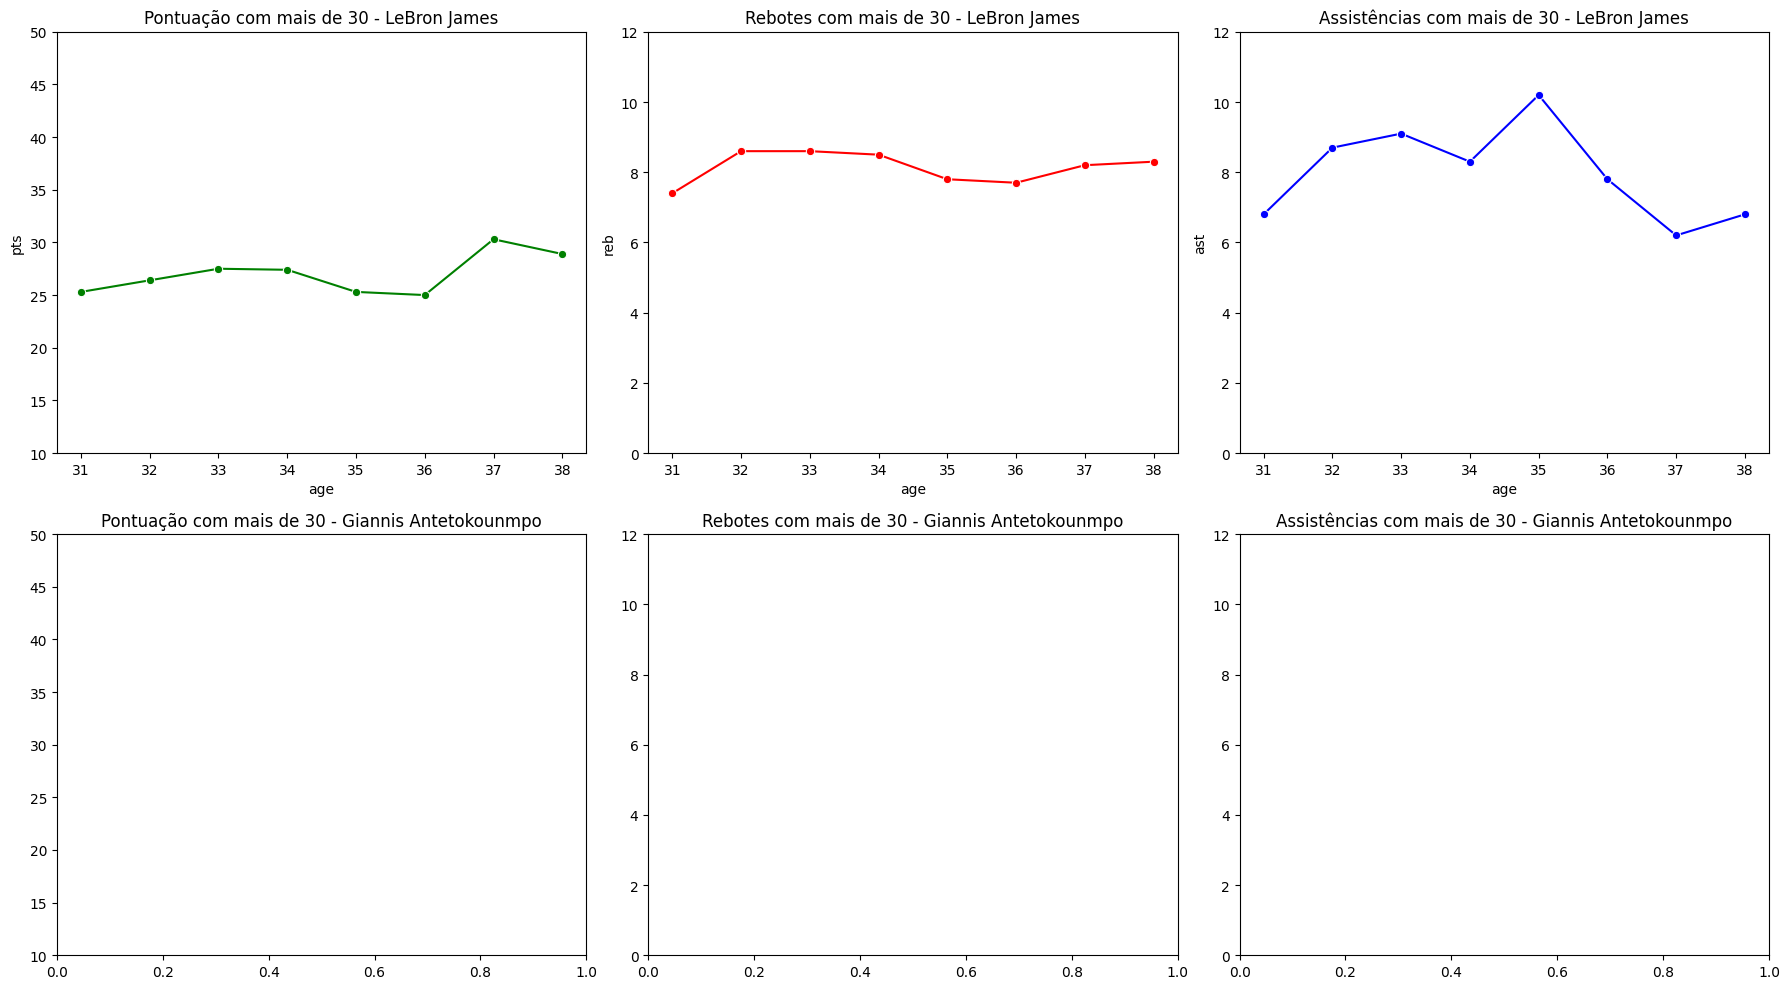

In [27]:
# Definindo os data frames de dois jogadores com mais de 30 anos.

jogadorA = NBA_score[(NBA_score['player_name'] == j1) & (NBA_score['age'] > 30)]
jogadorB = NBA_score[(NBA_score['player_name'] == j2) & (NBA_score['age'] > 30)]

#Plotando uma matriz de gráficos relacionando idade x peso, idade x rebotes, idade x assistências

fig, ax = plt.subplots(2, 3, figsize=(18, 10))

sns.lineplot(x=jogadorA['age'], y=jogadorA['pts'], color='green', marker='o', ax=ax[0,0])
ax[0,0].set_title(f'Pontuação {cd1} - {j1}')
ax[0,0].set_ylim([10, 50])

sns.lineplot(x=jogadorA['age'], y=jogadorA['reb'], color='red', marker='o', ax=ax[0,1])
ax[0,1].set_title(f'Rebotes {cd1} - {j1}')
ax[0,1].set_ylim([0, 12])

sns.lineplot(x=jogadorA['age'], y=jogadorA['ast'], color='blue', marker='o', ax=ax[0,2])
ax[0,2].set_title(f'Assistências {cd1} - {j1}')
ax[0,2].set_ylim([0, 12])

sns.lineplot(x=jogadorB['age'], y=jogadorB['pts'], color='green', marker='o', ax=ax[1,0])
ax[1,0].set_title(f'Pontuação {cd1} - {j2}')
ax[1,0].set_ylim([10, 50])

sns.lineplot(x=jogadorB['age'], y=jogadorB['reb'], color='red', marker='o', ax=ax[1,1])
ax[1,1].set_title(f'Rebotes {cd1} - {j2}')
ax[1,1].set_ylim([0, 12])

sns.lineplot(x=jogadorB['age'], y=jogadorB['ast'], color='blue', marker='o', ax=ax[1,2])
ax[1,2].set_title(f'Assistências {cd1} - {j2}')
ax[1,2].set_ylim([0, 12])

plt.tight_layout()
plt.show()

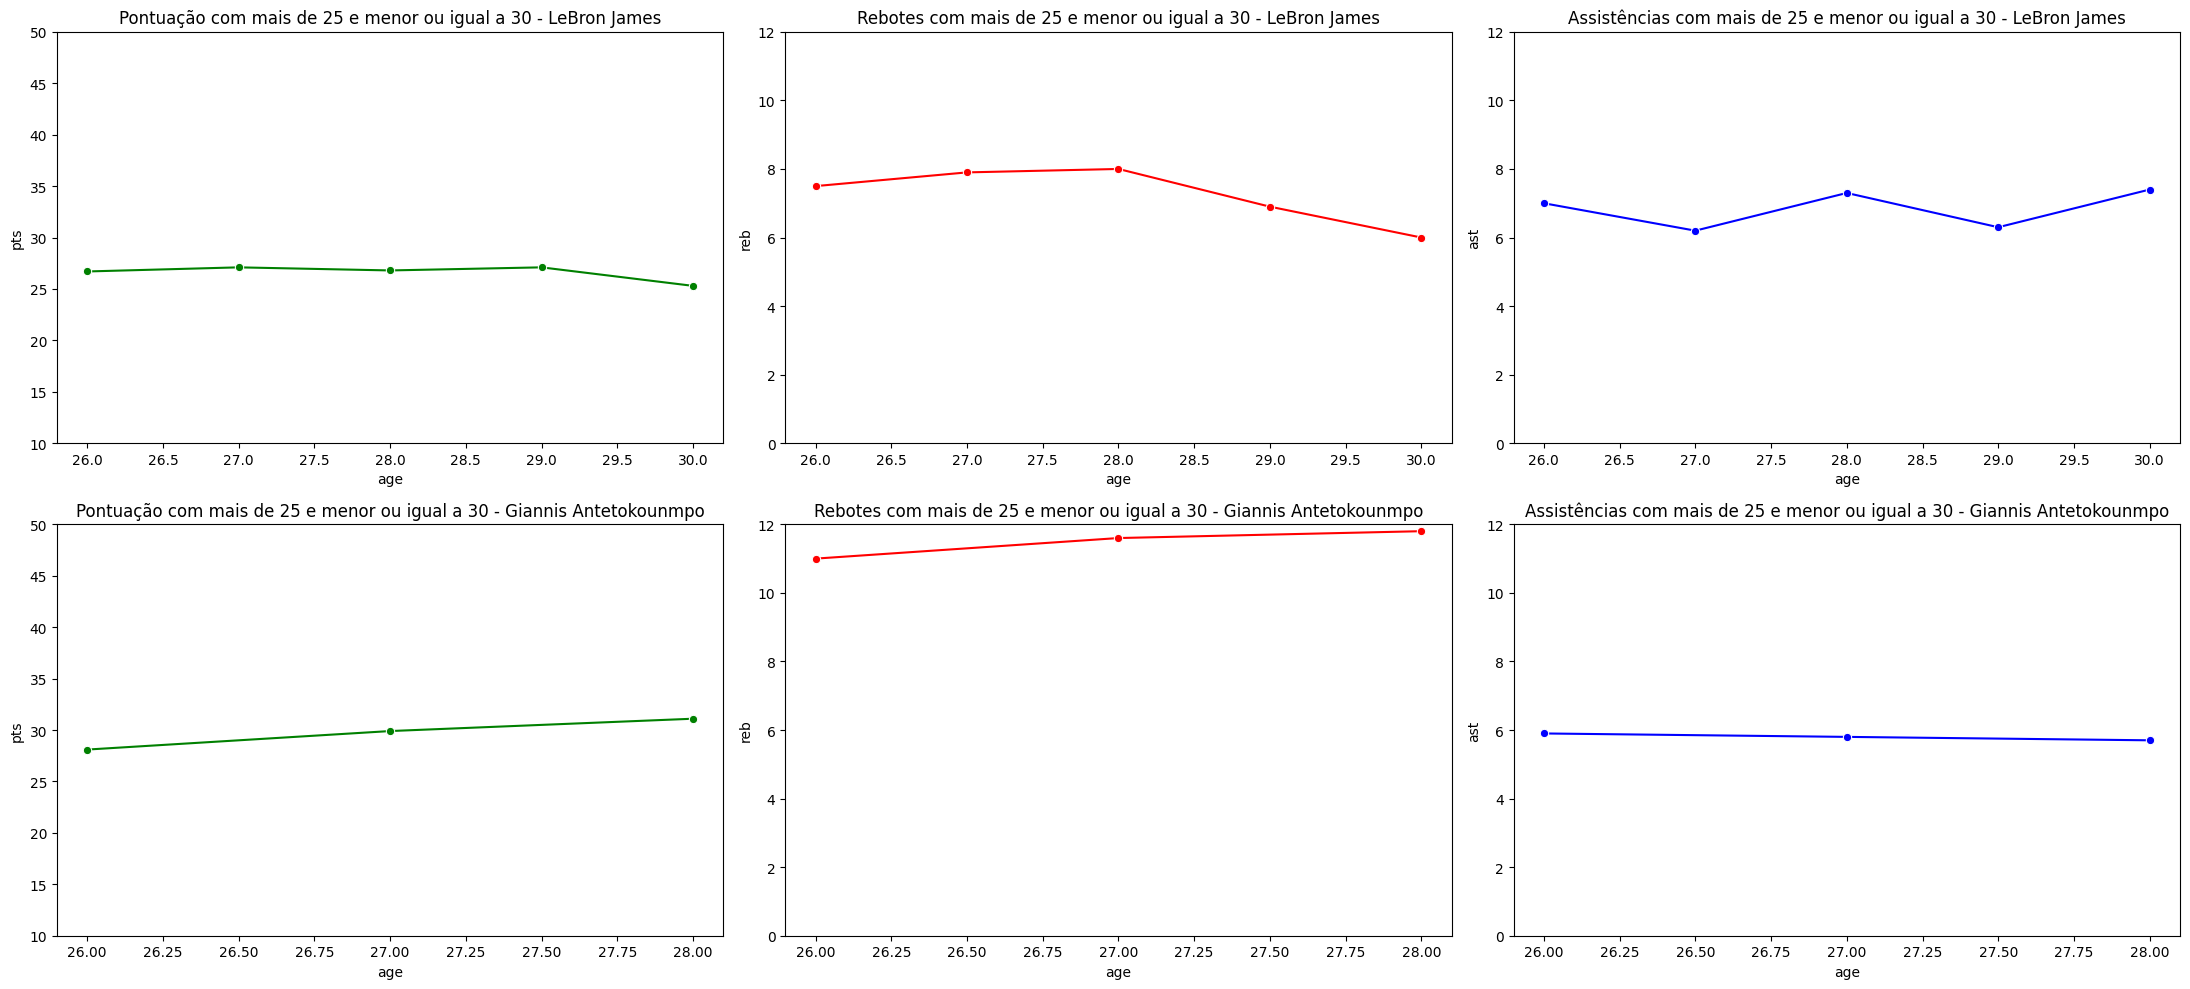

In [28]:
# Definindo os data frames de dois jogadores com mais de 25 e menos 30 anos.

jogadorA = NBA_score[(NBA_score['player_name'] == j1) & (NBA_score['age'] > 25) & (NBA_score['age'] <= 30)]
jogadorB = NBA_score[(NBA_score['player_name'] == j2) & (NBA_score['age'] > 25) & (NBA_score['age'] <= 30)]

#Plotando uma matriz de gráficos relacionando idade x peso, idade x rebotes, idade x assistências

fig, ax = plt.subplots(2, 3, figsize=(22, 10))

sns.lineplot(x=jogadorA['age'], y=jogadorA['pts'], color='green', marker='o', ax=ax[0,0])
ax[0,0].set_title(f'Pontuação {cd2} - {j1}')
ax[0,0].set_ylim([10, 50])

sns.lineplot(x=jogadorA['age'], y=jogadorA['reb'], color='red', marker='o', ax=ax[0,1])
ax[0,1].set_title(f'Rebotes {cd2} - {j1}')
ax[0,1].set_ylim([0, 12])

sns.lineplot(x=jogadorA['age'], y=jogadorA['ast'], color='blue', marker='o', ax=ax[0,2])
ax[0,2].set_title(f'Assistências {cd2} - {j1}')
ax[0,2].set_ylim([0, 12])

sns.lineplot(x=jogadorB['age'], y=jogadorB['pts'], color='green', marker='o', ax=ax[1,0])
ax[1,0].set_title(f'Pontuação {cd2} - {j2}')
ax[1,0].set_ylim([10, 50])

sns.lineplot(x=jogadorB['age'], y=jogadorB['reb'], color='red', marker='o', ax=ax[1,1])
ax[1,1].set_title(f'Rebotes {cd2} - {j2}')
ax[1,1].set_ylim([0, 12])

sns.lineplot(x=jogadorB['age'], y=jogadorB['ast'], color='blue', marker='o', ax=ax[1,2])
ax[1,2].set_title(f'Assistências {cd2} - {j2}')
ax[1,2].set_ylim([0, 12])

plt.tight_layout()
plt.show()

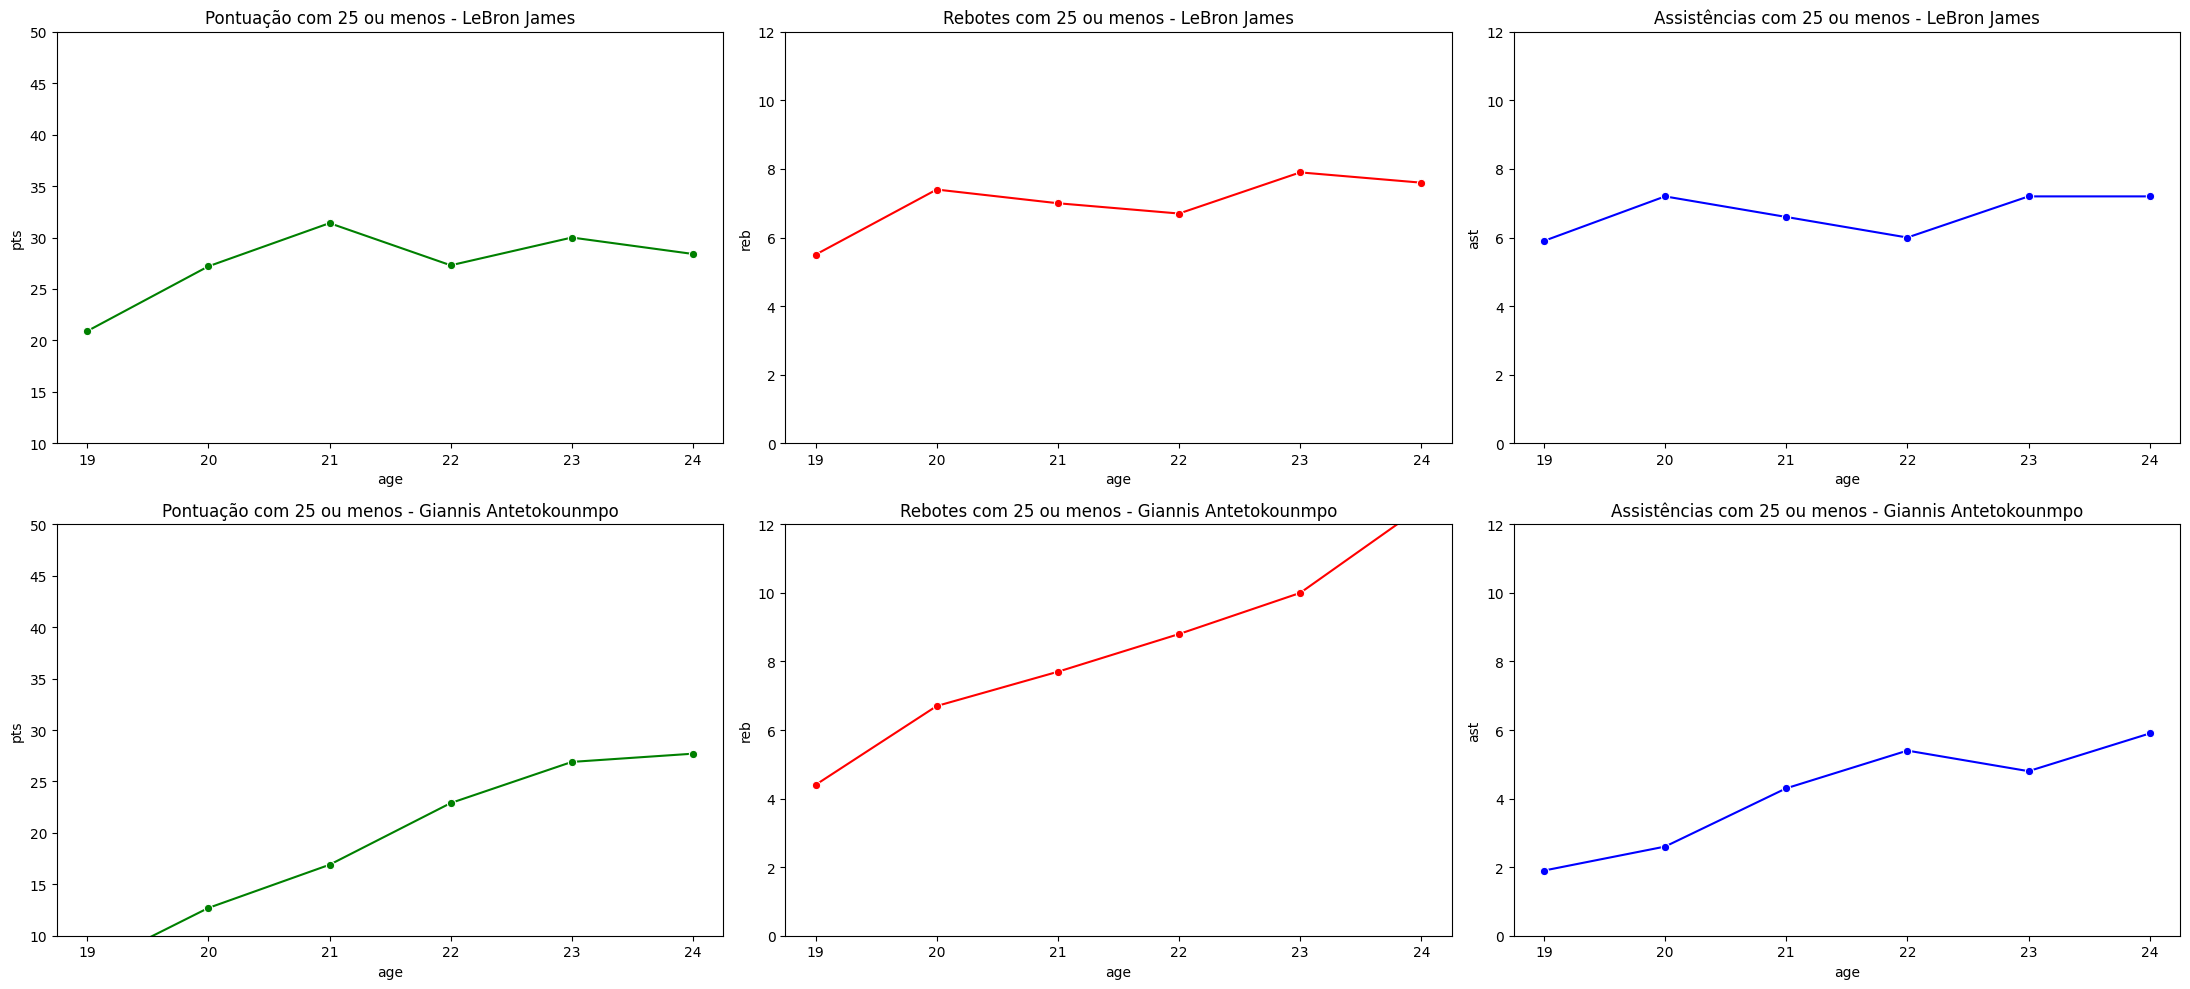

In [29]:
# Definindo os data frames de dois jogadores com menos de 25.

jogadorA = NBA_score[(NBA_score['player_name'] == j1) & (NBA_score['age'] < 25)]
jogadorB = NBA_score[(NBA_score['player_name'] == j2) & (NBA_score['age'] < 25)]

#Plotando uma matriz de gráficos relacionando idade x peso, idade x rebotes, idade x assistências

fig, ax = plt.subplots(2, 3, figsize=(22, 10))

sns.lineplot(x=jogadorA['age'], y=jogadorA['pts'], color='green', marker='o', ax=ax[0,0])
ax[0,0].set_title(f'Pontuação {cd3} - {j1}')
ax[0,0].set_ylim([10, 50])

sns.lineplot(x=jogadorA['age'], y=jogadorA['reb'], color='red', marker='o', ax=ax[0,1])
ax[0,1].set_title(f'Rebotes {cd3} - {j1}')
ax[0,1].set_ylim([0, 12])

sns.lineplot(x=jogadorA['age'], y=jogadorA['ast'], color='blue', marker='o', ax=ax[0,2])
ax[0,2].set_title(f'Assistências {cd3} - {j1}')
ax[0,2].set_ylim([0, 12])

sns.lineplot(x=jogadorB['age'], y=jogadorB['pts'], color='green', marker='o', ax=ax[1,0])
ax[1,0].set_title(f'Pontuação {cd3} - {j2}')
ax[1,0].set_ylim([10, 50])

sns.lineplot(x=jogadorB['age'], y=jogadorB['reb'], color='red', marker='o', ax=ax[1,1])
ax[1,1].set_title(f'Rebotes {cd3} - {j2}')
ax[1,1].set_ylim([0, 12])

sns.lineplot(x=jogadorB['age'], y=jogadorB['ast'], color='blue', marker='o', ax=ax[1,2])
ax[1,2].set_title(f'Assistências {cd3} - {j2}')
ax[1,2].set_ylim([0, 12])

plt.tight_layout()
plt.show()

LF

In [30]:
# Definição de um novo DataFrame apenas com as métricas necessárias
NBA_score = NBA[['player_name','age', 'team_abbreviation',
       'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'season']]

        # gp = games played
        # pts = média de pontos
        # reb = média de rebotes
        # ast = média de assistências
        # net rating = métrica que avalia o desempenho geral da equipe quando o jogador está em quadra



# Nova coluna com métrica de avaliação de score total na temporada, sem levar em consideração o número de partidas jogadas
# O score é dado pela soma das médias de pontos, rebotes e assistências na temporada
NBA_score['season_score'] = (NBA_score['pts'] + NBA_score['reb'] + NBA_score['ast'])

# Nova coluna que leva em consideração o número de partidas jogadas, criando um score por jogo
# O game score é dado pela divisão do score da temporada pelo núemro de jogos que o o jogador participou
NBA_score['game_score'] =  NBA_score['season_score'] / NBA_score['gp']

In [31]:
# Tabela com todos os jogadores da NBA tirando o LeBron James
df_geral = NBA_score[(NBA_score['player_name'] != 'LeBron James')]
# Tabela apenas com os dados referentes ao LeBron James
df_lebron = NBA_score[(NBA_score['player_name'] == 'LeBron James')]

In [32]:
df_lebron

,player_name,age,team_abbreviation,player_height,player_weight,gp,pts,reb,ast,net_rating,season,season_score,game_score
3448,LeBron James,19.0,CLE,203.20,108.86208,79,20.9,5.5,5.9,-2.6,2003-04,32.3,0.408861
3616,LeBron James,20.0,CLE,203.20,108.86208,80,27.2,7.4,7.2,1.9,2004-05,41.8,0.522500
4103,LeBron James,21.0,CLE,203.20,108.86208,79,31.4,7.0,6.6,4.2,2005-06,45.0,0.569620
4807,LeBron James,22.0,CLE,203.20,108.86208,78,27.3,6.7,6.0,5.4,2006-07,40.0,0.512821
5133,LeBron James,23.0,CLE,203.20,113.39800,75,30.0,7.9,7.2,2.4,2007-08,45.1,0.601333
5387,LeBron James,24.0,CLE,203.20,113.39800,81,28.4,7.6,7.2,14.7,2008-09,43.2,0.533333
6099,LeBron James,25.0,CLE,203.20,113.39800,76,29.7,7.3,8.6,10.8,2009-10,45.6,0.600000
6585,LeBron James,26.0,MIA,203.20,113.39800,79,26.7,7.5,7.0,10.5,2010-11,41.2,0.521519
6746,LeBron James,27.0,MIA,203.20,113.39800,62,27.1,7.9,6.2,10.7,2011-12,41.2,0.664516
7585,LeBron James,28.0,MIA,203.20,113.39800,76,26.8,8.0,7.3,14.1,2012-13,42.1,0.553947


In [33]:
# O objetivo foi definido como sendo a média do game score do LeBron
objetivo = df_lebron['game_score'].mean()
# A média de pontos é retirada da tabela geral, na qual LeBron não está presente para não influenciar os dados
media_pontos = df_geral['game_score'].mean()
# Desvio padrão retirado da tabela geral, assim como a média de pontos.
desvio_pontos = df_geral['game_score'].std()

print(f'Média de score por partida dos jogadores: {media_pontos} \n')
print(f'Desvio padrão de score por partida dos jogadores: {desvio_pontos}')

Média de score por partida dos jogadores: 0.3909355717020523 

Desvio padrão de score por partida dos jogadores: 0.8788039799755081


In [34]:
# Cálculo do Z Score que será aplicado no modelo de probabilidade

z = (objetivo - media_pontos) / desvio_pontos

In [35]:
# Cálculo da probabilidade

probabilidade = stats.norm.sf(z)
print(f'A probabilidade de um jogador atingir um game score de {objetivo} é de {probabilidade*100}%')

A probabilidade de um jogador atingir um game score de 0.6091156533221249 é de 40.196301090528294%


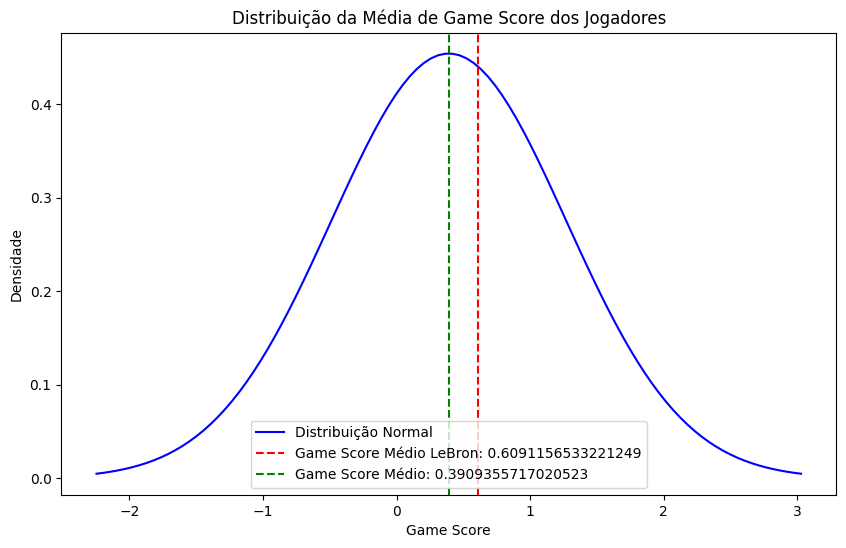

In [36]:
# Plotagem do gráfico

x = np.linspace(media_pontos - 3*desvio_pontos, media_pontos + 3*desvio_pontos, 100)
pdf = stats.norm.pdf(x, media_pontos, desvio_pontos)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição Normal', color='blue')
plt.axvline(objetivo, color='red', linestyle='--', label=f'Game Score Médio LeBron: {objetivo}')
plt.axvline(media_pontos, color='green', linestyle='--', label=f'Game Score Médio: {media_pontos}')
plt.title('Distribuição da Média de Game Score dos Jogadores')
plt.xlabel('Game Score')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [37]:
# Média de pontos retirada da tabela geral de jogadores, sem o LeBron
media_pontos = df_geral['pts'].mean()
# Desvio a partir da tabela geral
desvio_pontos = df_geral['pts'].std()
# Trget definido como a média da média de pontos por temporada do LeBron
objetivo = df_lebron['pts'].mean()

print(f'Média de pontos total dos jogadores: {media_pontos} \n')
print(f'Desvio padrão de pontos dos jogadores: {desvio_pontos}')

Média de pontos total dos jogadores: 8.182969432314412 

Desvio padrão de pontos dos jogadores: 5.973647192083152


In [38]:
# Cálculo do Z Score que será aplicado no modelo de probabilidade

z = (objetivo - media_pontos) / desvio_pontos

In [39]:
# Cálculo da probabilidade

probabilidade = stats.norm.sf(z)
print(f'A probabilidade de um jogador atingir uma média de pontos de {objetivo} é de {probabilidade*100:.4f}%')

A probabilidade de um jogador atingir uma média de pontos de 27.2 é de 0.0728%


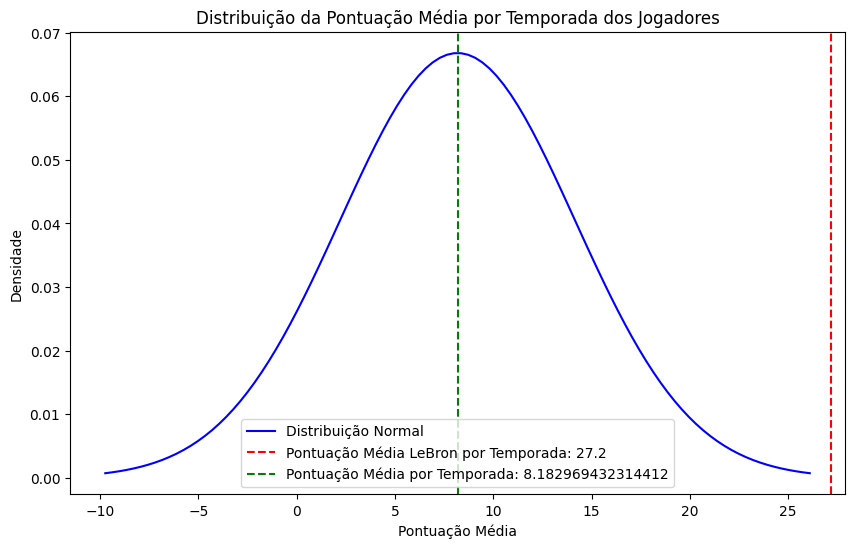

In [40]:
# Plotagem do gráfico

x = np.linspace(media_pontos - 3*desvio_pontos, media_pontos + 3*desvio_pontos, 100)
pdf = stats.norm.pdf(x, media_pontos, desvio_pontos)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição Normal', color='blue')
plt.axvline(objetivo, color='red', linestyle='--', label=f'Pontuação Média LeBron por Temporada: {objetivo}')
plt.axvline(media_pontos, color='green', linestyle='--', label=f'Pontuação Média por Temporada: {media_pontos}')
plt.title('Distribuição da Pontuação Média por Temporada dos Jogadores')
plt.xlabel('Pontuação Média')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [41]:
# Ranking de jogadores que conseguiram o feito de ter uma média igual ou maior que 30 pontos em uma temporada.
NBA_score[(NBA_score['pts'] >= 30)].value_counts('player_name')

player_name
Allen Iverson              4
James Harden               3
LeBron James               3
Kobe Bryant                3
Joel Embiid                2
Kevin Durant               2
Damian Lillard             2
Bradley Beal               2
Stephen Curry              2
Jayson Tatum               1
Dwyane Wade                1
Giannis Antetokounmpo      1
Luka Doncic                1
Russell Westbrook          1
Shai Gilgeous-Alexander    1
Tracy McGrady              1
Name: count, dtype: int64

In [42]:
# Média de pontos por temporada a partir da tabela geral de jogadores, incluindo LeBron
media_pontos = NBA_score['pts'].mean()
# Desvio padrão a partir da tabela geral de jogadores
desvio_pontos = NBA_score['pts'].std()
# Target definido como 30 pontos na temporada
objetivo = 30

print(f'Média de pontos total dos jogadores: {media_pontos} \n')
print(f'Desvio padrão de pontos dos jogadores: {desvio_pontos}')

Média de pontos total dos jogadores: 8.212581750233571 

Desvio padrão de pontos dos jogadores: 6.01657348405825


In [43]:
# Cálculo do Z Score que será aplicado no modelo de probabilidade

z = (objetivo - media_pontos) / desvio_pontos

In [44]:
# Cálculo da probabilidade

probabilidade = stats.norm.sf(z)
print(f'A probabilidade de um jogador atingir uma média de {objetivo} pontos na temporada é de {probabilidade*100}')

A probabilidade de um jogador atingir uma média de 30 pontos na temporada é de 0.0146600792111548


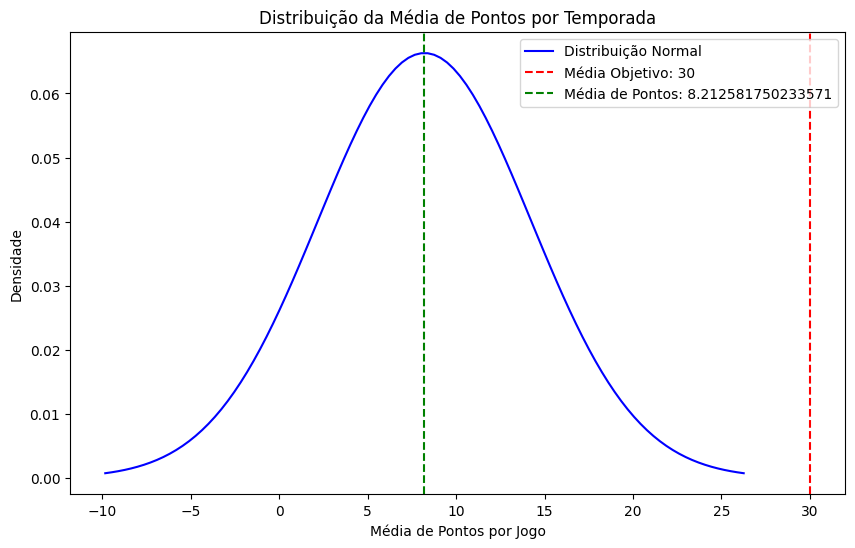

In [45]:
# Plotagem do gráfico

x = np.linspace(media_pontos - 3*desvio_pontos, media_pontos + 3*desvio_pontos, 100)
pdf = stats.norm.pdf(x, media_pontos, desvio_pontos)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição Normal', color='blue')
plt.axvline(objetivo, color='red', linestyle='--', label=f'Média Objetivo: {objetivo}')
plt.axvline(media_pontos, color='green', linestyle='--', label=f'Média de Pontos: {media_pontos}')
plt.title('Distribuição da Média de Pontos por Temporada')
plt.xlabel('Média de Pontos por Jogo')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# **Teste A/B**
---

### **Teste 1**
A idade de LeBron James afetou a quantidade de pontos marcados nas partidas?

In [46]:
# Divisão dos dados em dois DataFrames distintos com as médias de pontos antes e após 30 anos de idade.
LB_antes_30 = df_lebron[(df_lebron['age'] < 30)]['pts']
LB_depois_30 = df_lebron[(df_lebron['age'] >= 30)]['pts']

In [47]:
# Cálculo da estatística t e do p alue
t_stat, p_value = stats.ttest_ind(LB_antes_30, LB_depois_30)

print(f'Estatística t: {t_stat:.4f} \n')
print(f'P Value: {p_value:.4f}')

Estatística t: 0.6487 

P Value: 0.5247


In [48]:
# Validação de hipótese
alpha = 0.05
if p_value < alpha:
    print("Há uma diferença significativa na quantidade de porntos marcados por LeBron após os 30 anos.")
else:
    print("Não há diferença significativa na quantidade de porntos marcados por LeBron após os 30 anos.")

Não há diferença significativa na quantidade de porntos marcados por LeBron após os 30 anos.


**Conclusão**

Apesar de ter ficado mais velho, LeBron James não teve alteração significativa na média de pontos marcados, se mantendo como um dos jogadores com a média de pontos mais alta da liga.

---

### **Teste 2**
A idade de LeBron James afetou seu game score de forma significativa?

In [49]:
# Divisão dos dados em dois DataFrames distintos com as médias de pontos antes e após 30 anos de idade.
LB_antes_30 = df_lebron[(df_lebron['age'] < 30)]['game_score']
LB_depois_30 = df_lebron[(df_lebron['age'] >= 30)]['game_score']

In [50]:
# Cálculo da estatística t e do p alue
t_stat, p_value = stats.ttest_ind(LB_antes_30, LB_depois_30)

print(f'Estatística t: {t_stat:.4f} \n')
print(f'P Value: {p_value:.4f}')

Estatística t: -2.9374 

P Value: 0.0088


In [51]:
# Validação de hipótese
alpha = 0.05
if p_value < alpha:
    print("O desempenho de game score mudou significativamente para LeBron após os 30 anos.")
else:
    print("O desempenho de game score não mudou significativamente para LeBron após os 30 anos.")

O desempenho de game score mudou significativamente para LeBron após os 30 anos.


In [52]:
print('Games Score Médio de LeBron James antes dos 30 anos.')
print(df_lebron[(df_lebron['age'] < 30)]['game_score'].mean())

Games Score Médio de LeBron James antes dos 30 anos.
0.546529754574283


In [53]:
print('Games Score Médio de LeBron James depois dos 30 anos.')
print(df_lebron[(df_lebron['age'] >= 30)]['game_score'].mean())

Games Score Médio de LeBron James depois dos 30 anos.
0.6856095295694871


**Conclusão**

Apesar de LeBron James ter envelhecido, suas métricas melhoraram com a idade, de forma que sua experiência não apenas manteve uma alta média de pontos, como também elevou a média de rebotes e assistências dadas pelo jogador.

---

#### Plots

In [54]:
%matplotlib inline
sns.set(style="whitegrid")

In [55]:
def plot_heatmap():
    plt.figure(figsize=(14, 10))
    corr = NBA_NUM.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Mapa de Calor das Correlações", fontsize=15)
    plt.show()

In [56]:
def plot_histograma_pontos_idade():
    plt.figure(figsize=(14, 10))
    sns.histplot(NBA_NUM['age'], bins=10, kde=False, color='purple')
    plt.title("Distribuição de Pontos por Idade", fontsize=15)
    plt.xlabel("Idade")
    plt.ylabel("Frequência")
    plt.show()

In [57]:
def plot_jogadores_mais_30_pontos():
    plt.figure(figsize=(12, 6))

    mais_30 = NBA[(NBA['age'] >= 30) & (NBA['pts'] >= 30)]
    menos_30 = NBA[(NBA['age'] > 25) & (NBA['age'] < 30) & (NBA['pts'] >= 30)]
    menos_25 = NBA[(NBA['age'] <= 25) & (NBA['pts'] >= 30)]

    sns.barplot(x=mais_30['player_name'], y=mais_30['pts'], color='red', label='> 30 anos')
    sns.barplot(x=menos_30['player_name'], y=menos_30['pts'], color='blue', label='25-30 anos')
    sns.barplot(x=menos_25['player_name'], y=menos_25['pts'], color='green', label='< 25 anos')

    plt.title('Jogadores com +30 Pontos por Faixa Etária', fontsize=15)
    plt.xlabel('Nome do Jogador')
    plt.ylabel('Pontos')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

In [58]:
def plot_comparacao_estrelas():
    tabela_lebron = NBA_score[NBA_score['player_name'] == 'LeBron James']
    game_score_mean_lebron = tabela_lebron['game_score'].mean()

    giannis = NBA_score[NBA_score['player_name'] == 'Giannis Antetokounmpo']
    media_giannis = giannis['game_score'].mean()

    doncic = NBA_score[NBA_score['player_name'] == 'Luka Doncic']
    medi_doncic = doncic['game_score'].mean()

    kobe = NBA_score[NBA_score['player_name'] == 'Kobe Bryant']
    media_kobe = kobe['game_score'].mean()

    embiid = NBA_score[NBA_score['player_name'] == 'Joel Embiid']
    media_embiid = embiid['game_score'].mean()

    stars = pd.DataFrame({
        'Jogador': ['LeBron James', 'Luka Doncic', 'Giannis Antetokounmpo', 'Kobe Bryant', 'Joel Embiid'],
        'Média Game Score': [game_score_mean_lebron, medi_doncic, media_giannis, media_kobe, media_embiid]
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=stars, x='Jogador', y='Média Game Score', marker='o')
    plt.title('Comparação de Game Score entre Estrelas', fontsize=15)
    plt.xlabel('Jogador')
    plt.ylabel('Média Game Score')
    plt.show()

In [59]:
def plot_tendencia_game_score_idade():
    age_mean_game_score = NBA_score.groupby('age')['game_score'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=age_mean_game_score, x='age', y='game_score', marker='o', color='green')
    plt.title('Tendência do Game Score com a Idade', fontsize=15)
    plt.xlabel('Idade')
    plt.ylabel('Média Game Score')
    plt.show()

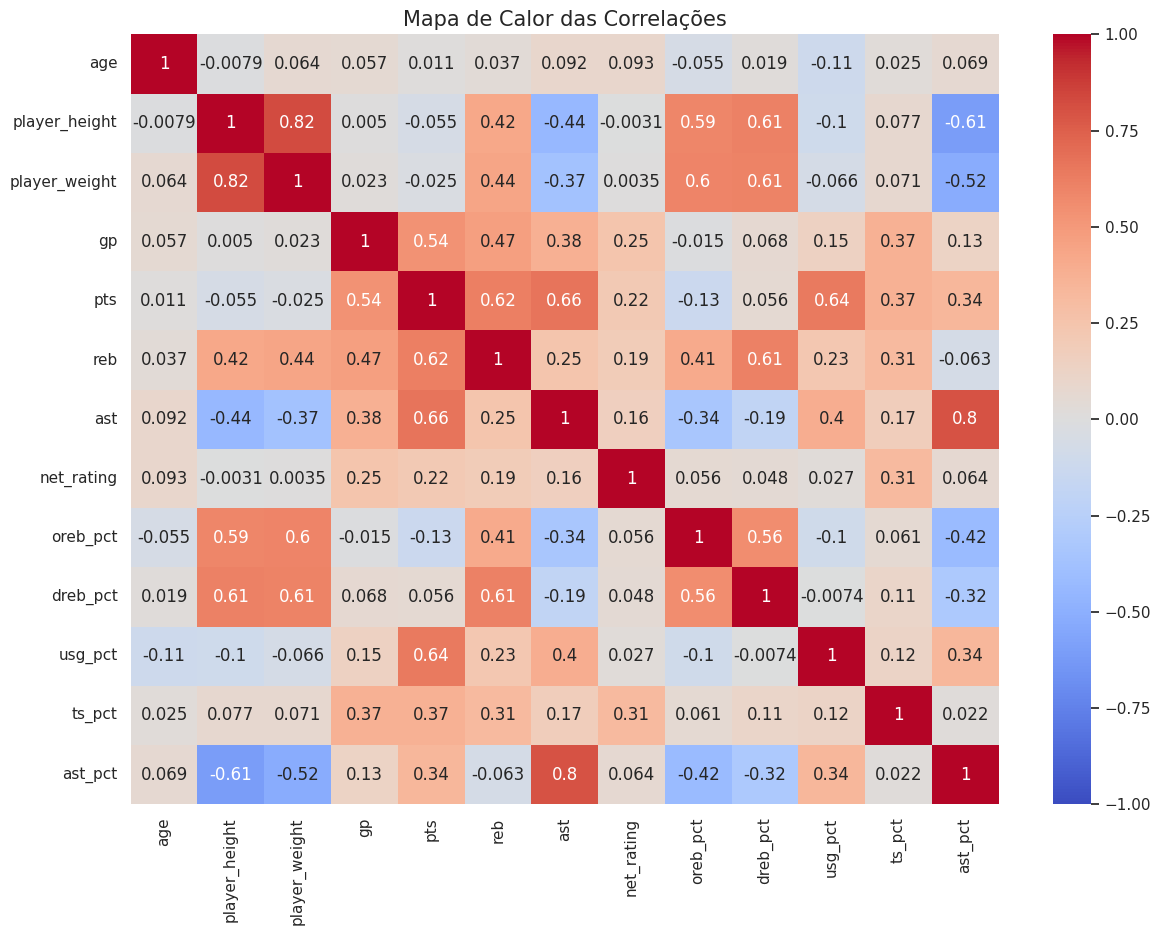

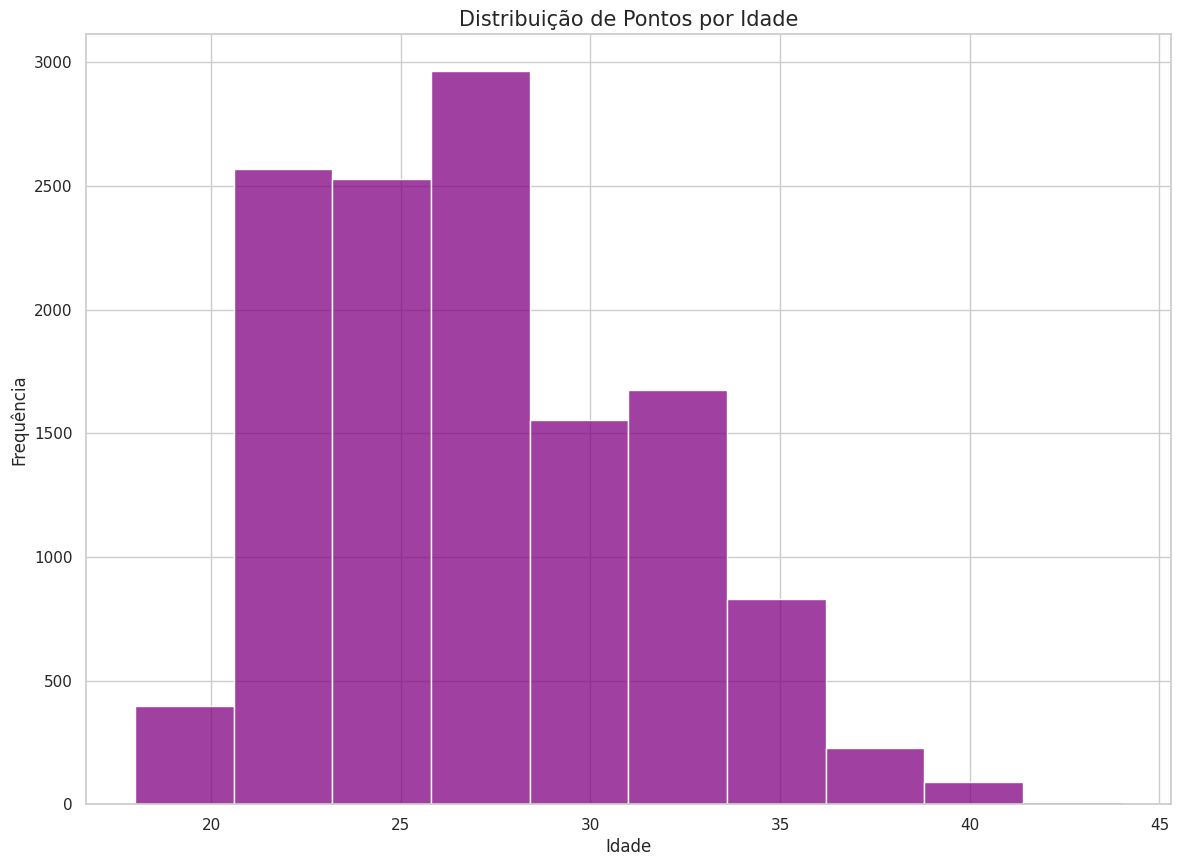

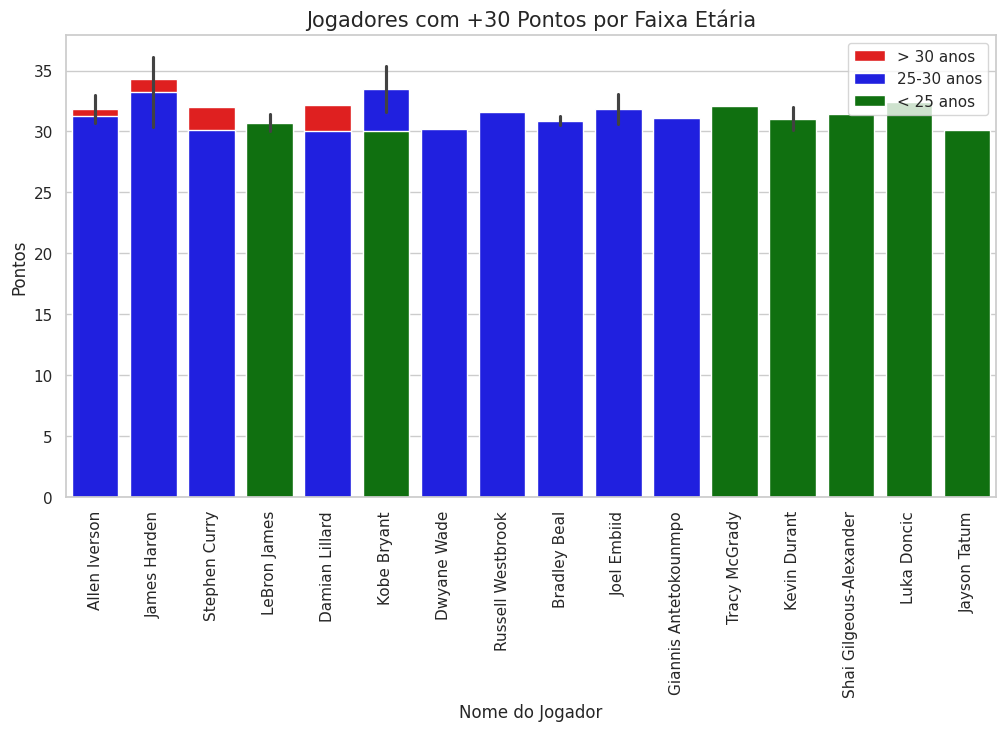

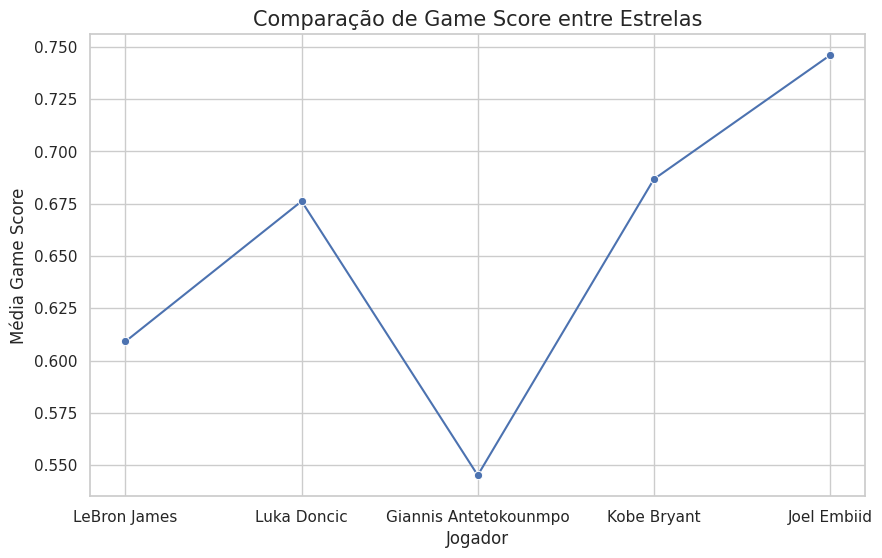

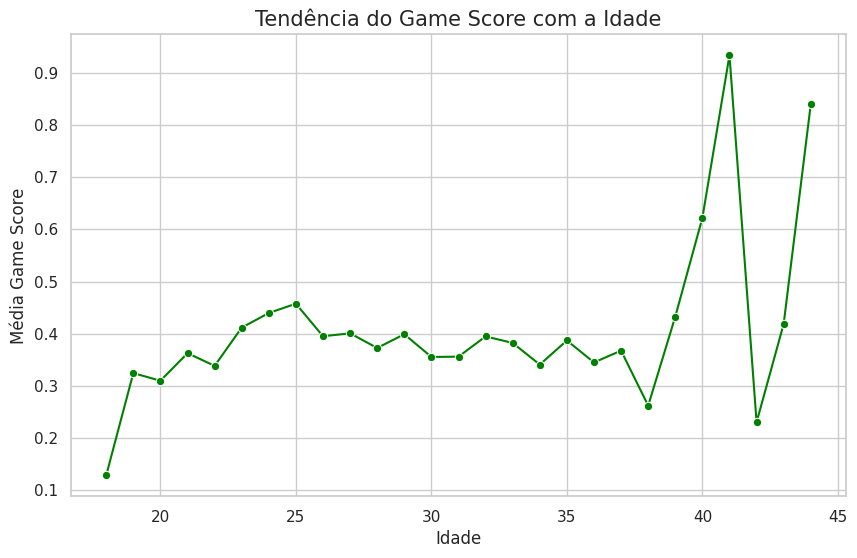

In [60]:
plot_heatmap()
plot_histograma_pontos_idade()
plot_jogadores_mais_30_pontos()
plot_comparacao_estrelas()
plot_tendencia_game_score_idade()